# Analysis highest chance at survival on titanic.
In this analysis we will be looking at what factors give you the highest chance of survival on the titanic.

We will be using pandas for exploring and manipulating data, seaborn and matplotlib for making charts.

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Reading data and looking at how data is structured.
Using head() to print the 5 highest rows.

In [5]:
data = pd.read_csv('titanic.csv')
data.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


## Checking for null values.
Checking for null using isnull() and summing that up using sum().

In [6]:
data.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

## Dropping data.
Data wont be used in analysis so no point in keeping it. 

In [7]:
data = data.drop(['sibsp'], axis=1)

## Amount of people that survived in comparising to how many died.
We can see that mostly 20-25 years olds were on board, they are not the most likely to survive. You can see that looking at the ratio of the two colors. 0 stands for not survived, 1 stands for survived.

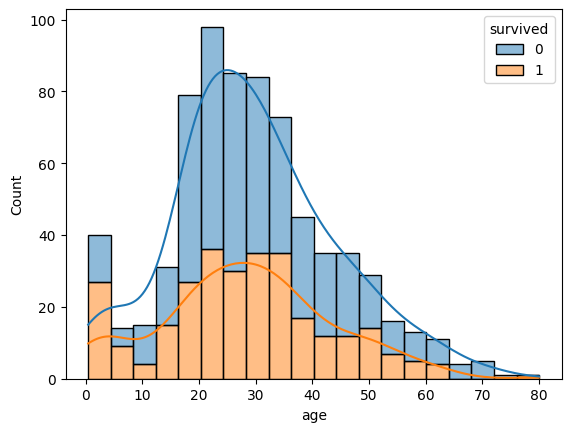

In [8]:
sns.histplot(data=data, x='age', hue='survived', multiple='stack', kde=True);

## Percentage of people that survived sorted by age.
In this chart, below 0.59 stands for 59%.

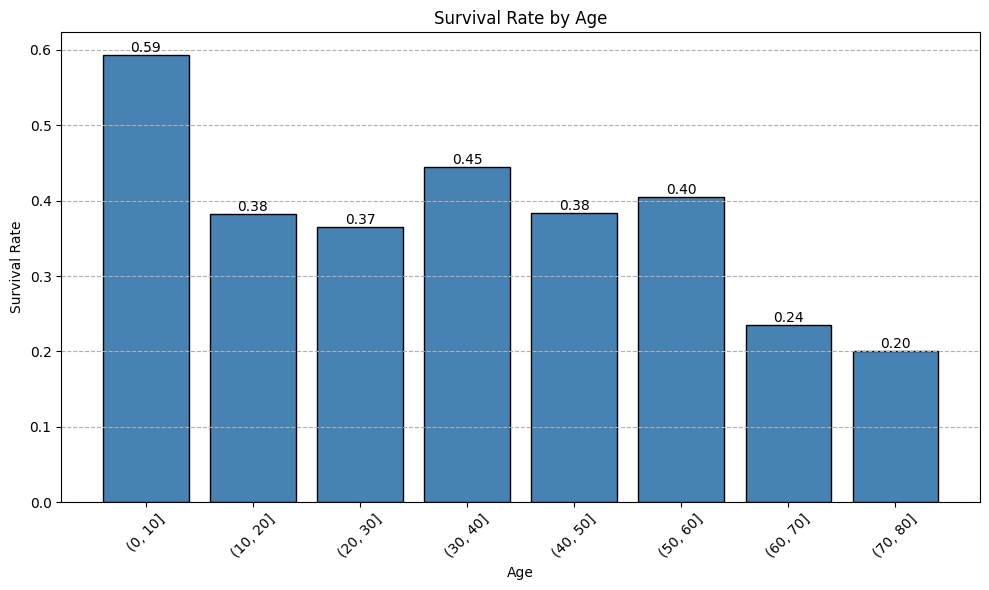

In [9]:
age_groups = data.groupby(pd.cut(data['age'], bins=range(0, 90, 10)))
survival_rate = age_groups['survived'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(survival_rate.index.astype(str), survival_rate.values, color='steelblue', edgecolor='black')

ax.set_xlabel('Age')
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rate by Age')

plt.xticks(rotation=45)

ax.grid(axis='y', linestyle='--')

for i, rate in enumerate(survival_rate.values):
    ax.text(i, rate, f'{rate:.2f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

## Chart about how much people paid and if they survived based on age.
We can see a slight improvement on the rate of survival when people pay more but nothing significant.

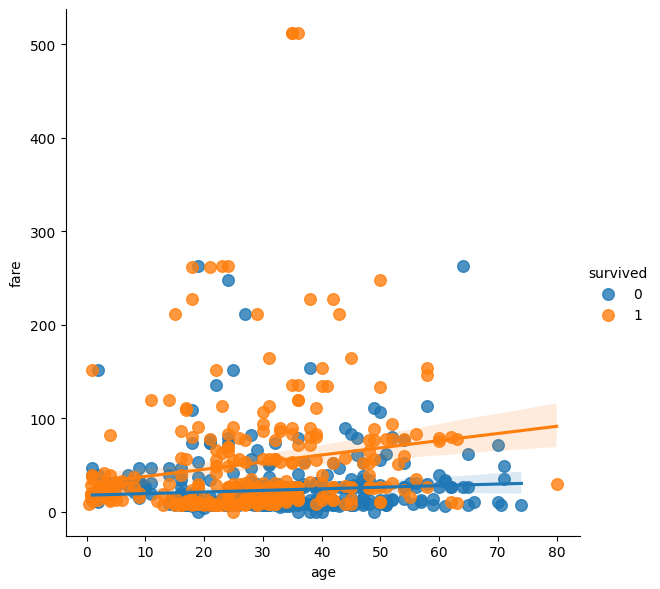

In [16]:
sns.lmplot(data=data, x='age', y='fare', hue='survived', scatter_kws={'s': 70}, height=6);

## Chart to see if being in first class made a difference in survival chances.
As you can see, being in first class made a very significant difference in the survival rate, with the chance of living being more than doubled in comparison to people in third class.

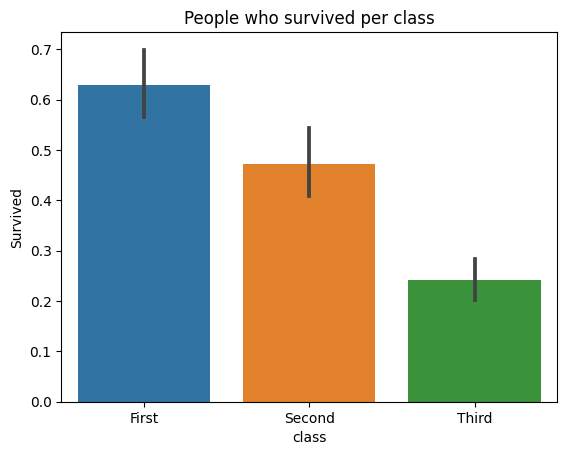

In [11]:
order = ['First', 'Second', 'Third']
sns.barplot(x=data['class'],y=data['survived'], order=order)
plt.title('People who survived per class')
plt.xlabel('class')
plt.ylabel('Survived');

## Cost of first class tickets in comparison to second and third class tickets.
We can observe that the cost of first-class tickets sometimes matches the price of second and third-class tickets, despite first class having a significantly higher survival rate. This finding explains why the amount individuals pay to be on board did not have a significant impact on their chances of survival, while being in first class did have a substantial impact.

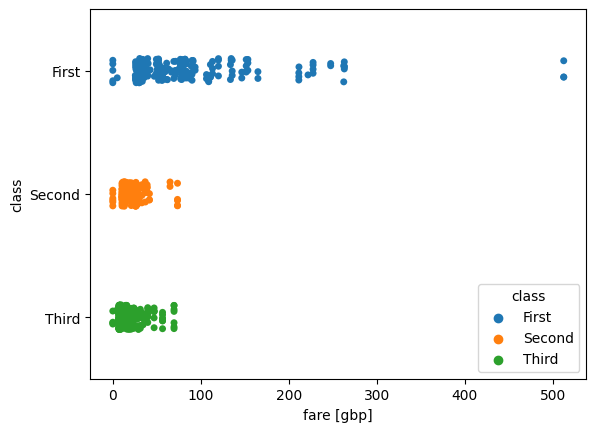

In [12]:
sns.stripplot(data=data, x='fare', y='class', hue='class', hue_order=order, order=order)
plt.xlabel('fare [gbp]');

## Pie chart to see the amount of women compared to the amount of men.
This code generates a pie chart to visualize the distribution of genders in the Titanic.

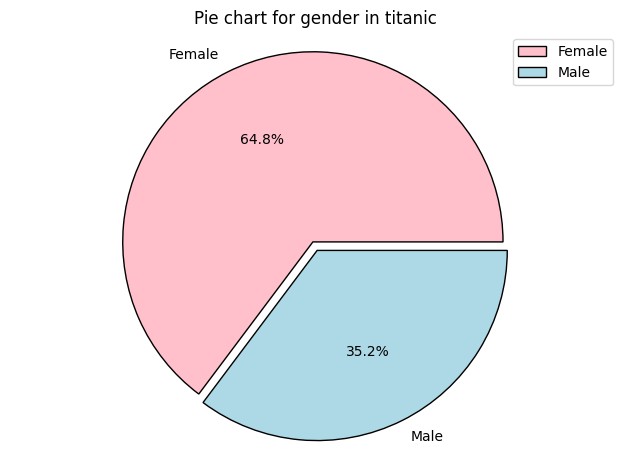

In [15]:
titanic_gender = data['sex'].value_counts(normalize = True)
wp = { 'linewidth' : 1, 'edgecolor' : 'black' }
plt.pie(titanic_gender, 
        labels = ['Female','Male'],
        colors = ['pink', 'lightblue'],
        autopct = '%0.1f%%',
        explode = [0, 0.05],
        wedgeprops = wp
      );
plt.title('Pie chart for gender in titanic')
plt.legend(loc='upper right')
plt.axis('equal')
plt.tight_layout()

## Bar chart: comparison of male and female survivors.
We can see a bar chart that compares the number of male and female passengers who survived the Titanic disaster. The chart highlights the fact that there were significantly more men on the ship, but a larger number of women survived despite the gender imbalance.

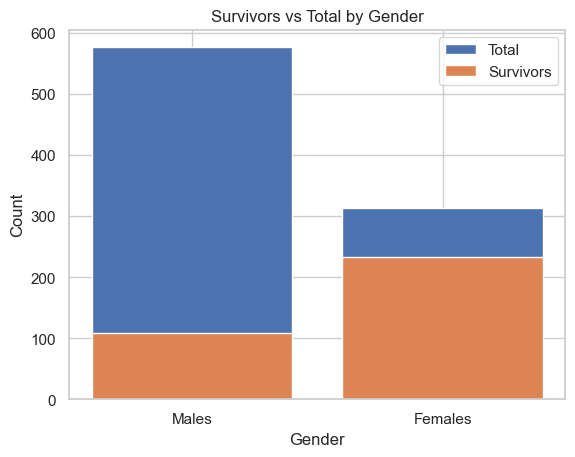

In [223]:
male_count = data[data['sex'] == 'male'].shape[0]
female_count = data[data['sex'] == 'female'].shape[0]

male_survivors = data[(data['sex'] == 'male') & (data['survived'] == 1)].shape[0]
female_survivors = data[(data['sex'] == 'female') & (data['survived'] == 1)].shape[0]

categories = ['Males', 'Females']
total_counts = [male_count, female_count]
survivor_counts = [male_survivors, female_survivors]

plt.bar(categories, total_counts, label='Total')
plt.bar(categories, survivor_counts, label='Survivors')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survivors vs Total by Gender')
plt.legend()

plt.show()

## Bar chart that compares how many people got on the ship on the three stops.
C stand for Cherbourg, Q for Queenstown and S for Southampton.

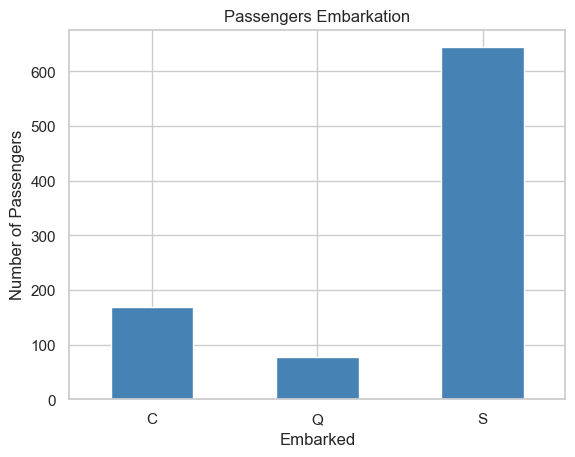

In [212]:
value_counts = data['embarked'].value_counts()

category_order = ['C', 'Q', 'S']

value_counts = value_counts.reindex(category_order)

fig, ax = plt.subplots()

value_counts.plot(kind='bar', ax=ax, color='steelblue')

plt.title('Passengers Embarkation')
plt.xlabel('Embarked')
plt.ylabel('Number of Passengers')

ax.set_xticklabels(value_counts.index, rotation=0)

plt.show()

## Bar chart that compares the survival rate of the people based on what stop they got on.
As we can see in the chart that if u got in at Cherbourg u are much more likely to life.

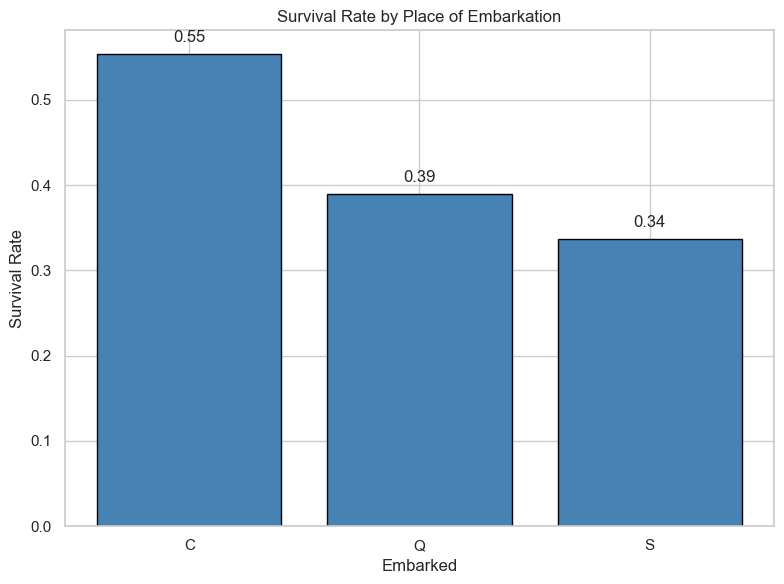

In [213]:
survival_rates_embarked = data.groupby('embarked')['survived'].mean()

category_order = ['C', 'Q', 'S']

value_counts = value_counts.reindex(category_order)


fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(survival_rates_embarked.index, survival_rates_embarked.values, color='steelblue', edgecolor='black')

for i, v in enumerate(survival_rates_embarked.values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

ax.set_xlabel('Embarked')
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rate by Place of Embarkation')

plt.tight_layout()
plt.show()


## Conclusion.
From all the info that we have, we can take the conclusion that your survival rate is the highest if you are: a female aged 0-10, sat in first class and boarded in Cherbourg. and the lowest if you're: a male 70-80 year old, sat in third class and embarked in Southampton.